# Classification Project
## Salaries prediction with 'Adult' dataset <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Adult

#### Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. Prediction task is to determine whether a person makes over 50K a year. <br>

### Attribute Information: 

<b>age:</b> <br>
Continuous. <br>

<b>workclass:</b> <br>
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>

<b>fnlwgt:</b> <br>
Continuous. Final weight, which is the number of units in the target population that the responding unit represents. <br>

<b>education:</b> <br>
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>

<b>education-num:</b> <br>
Continuous. : The highest level of education achieved in numerical form. <br>

<b>marital-status:</b> <br>
Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. <br>
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>

<b>occupation:</b> <br>
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>

<b>relationship:</b> <br>
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>

<b>race:</b> <br>
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>

<b>sex:</b> <br>
Female, Male. <br>

<b>capital-gain:</b> <br>
Capital gains for an individual. Continuous. <br>

<b>capital-loss:</b> <br>
Capital loss for an individual. Continuous. <br>

<b>hours-per-week:</b> <br>
Continuous. <br>

<b>native-country:</b> <br>
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Timing the script:

In [1]:
from datetime import datetime
startTime = datetime.now()

Basic libraries:

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Importing the data:

Training data:

In [4]:
df_training_original = pd.read_csv('training.data', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Test data:

In [5]:
df_test_original = pd.read_csv('test.test', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Making a copy of the originally imported data:

In [6]:
df_test = df_test_original.copy()
df_training = df_training_original.copy()

Check the data:

In [7]:
df_training

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df_test

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Exploratory Data Analysis (EDA):

Training data:

In [9]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Week-Hours      32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Test data:

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   FNLWGT          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital-status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Week-Hours      16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Descriptions of basic statistics:

In [11]:
df_training.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_test.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


Basic check for missing values (further checks will show that there actually ARE missing values, just marked with "?" as a placeholder):

In [13]:
df_training.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

In [14]:
df_test.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

Correlation between the variables:

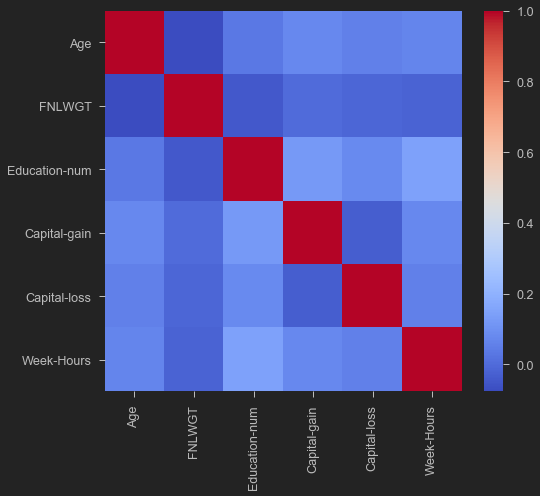

In [15]:
sns.heatmap(df_training.corr(), cmap='coolwarm')

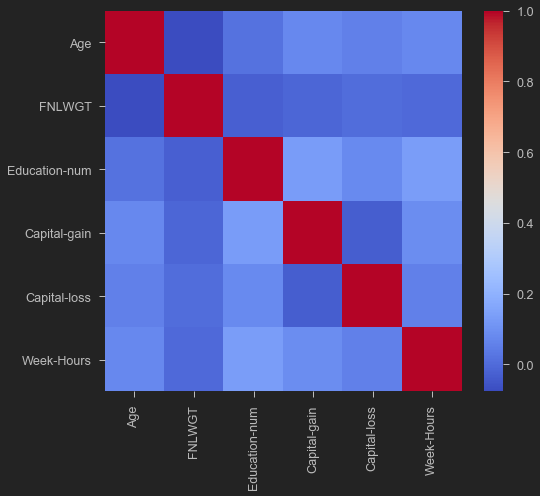

In [16]:
sns.heatmap(df_test.corr(), cmap='coolwarm')

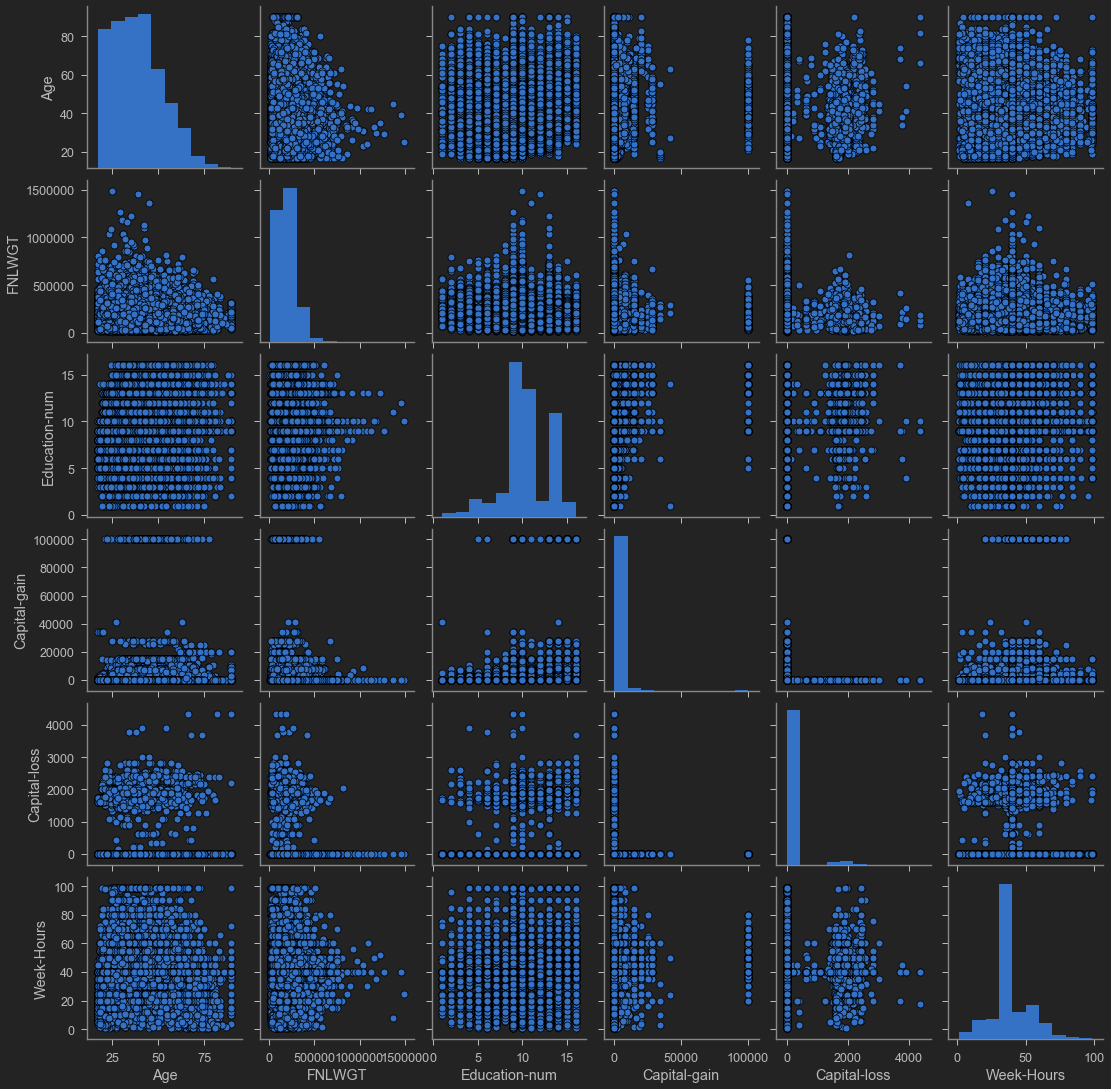

In [17]:
sns.pairplot(df_training, plot_kws=dict(edgecolor="black"))

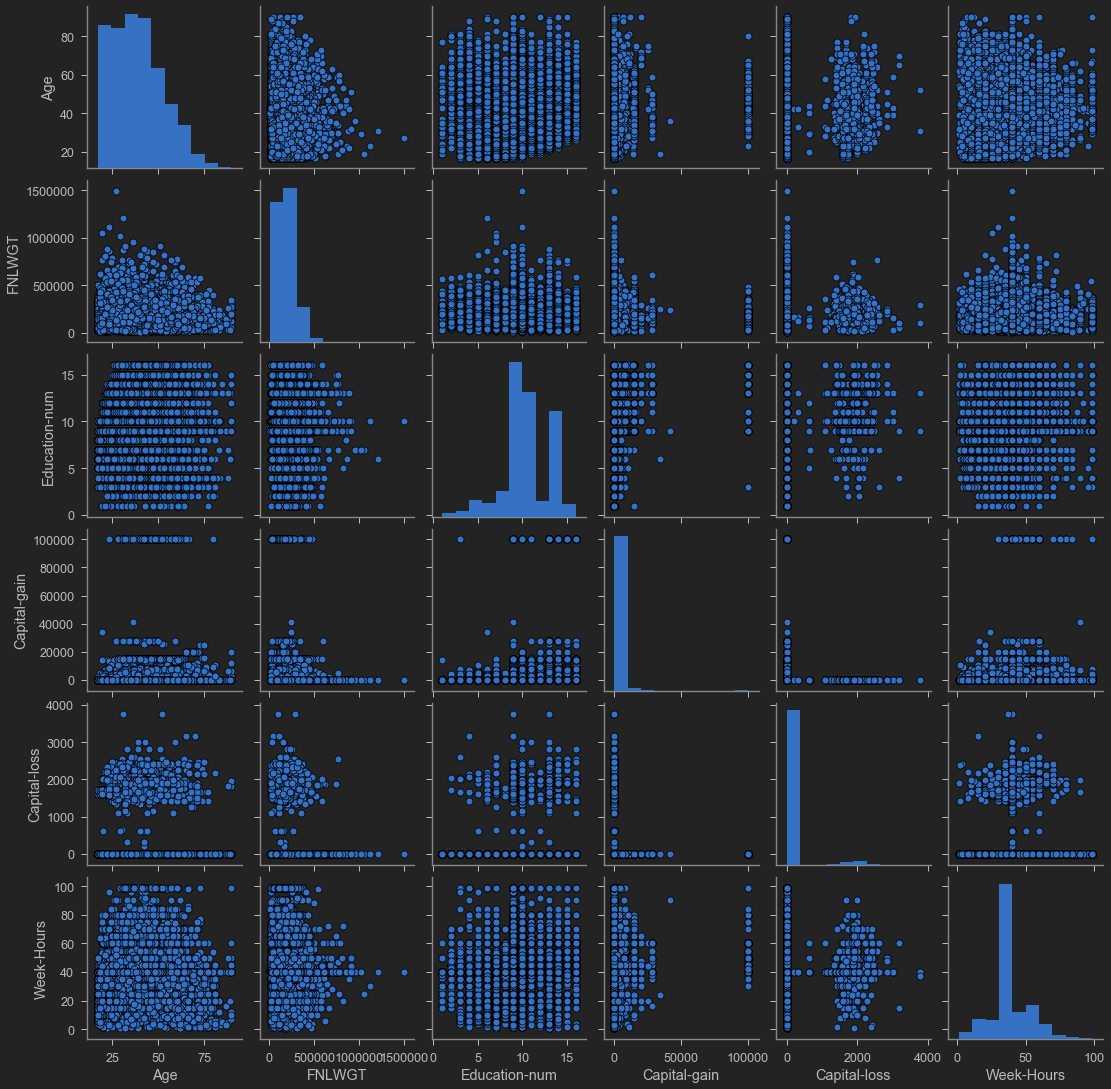

In [18]:
sns.pairplot(df_test, plot_kws=dict(edgecolor="black"))

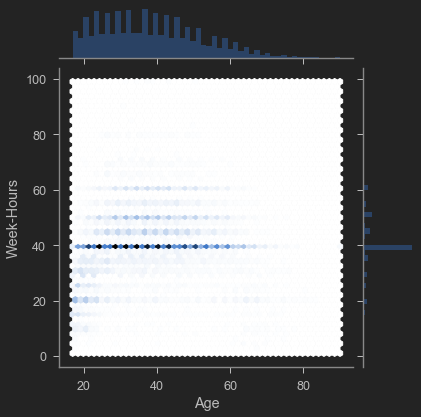

In [19]:
sns.jointplot(x='Age',y='Week-Hours',data=df_training, kind='hex');

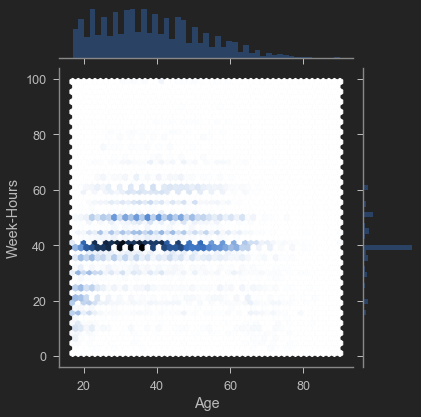

In [20]:
sns.jointplot(x='Age',y='Week-Hours',data=df_test, kind='hex');

The dataset split provided is reasonable. The test set takes up ~33% of all the data and is <u>representative</u>.

## Concatenating Training and Test sets
For clarity and consistent pre-processing I decided to temporary concatenate training and test dataframes that initially came separately from UCI. I will split them again before the training.

In [21]:
#Test set:
#df.iloc[32561:,:]

In [22]:
df = pd.concat([df_training, df_test], ignore_index=True)

In [23]:
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# <span style="color:orange"> Temporary slice for prototyping: </span>

In [24]:
#df = df.sample(frac=0.5, random_state=42)

### Salary (dependent variable):

In [25]:
df['Salary'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

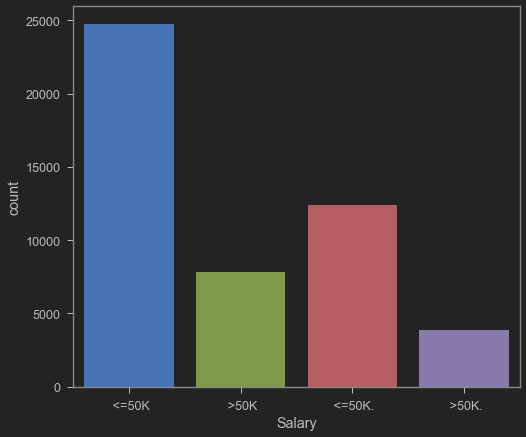

In [26]:
sns.countplot(df['Salary'])

In [27]:
d = {' <=50K': 0, ' <=50K.': 0, ' >50K': 1,' >50K.': 1}
df['Salary'] = df['Salary'].map(d)

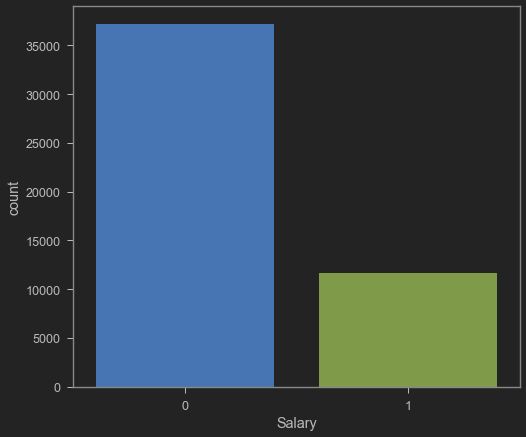

In [28]:
sns.countplot(df['Salary']);

We have an imbalanced dataset. The influence of balancing to be checked later.

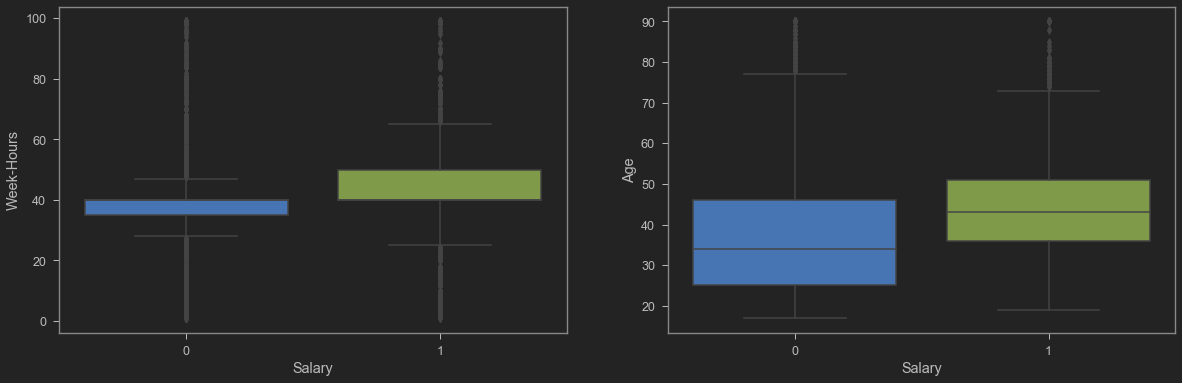

In [29]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='Week-Hours',x='Salary',data=df,ax=a)
sns.boxplot(y='Age',x='Salary',data=df,ax=b);

People working more than 40 hrs per week and in their early 40s are more likely to earn over 50 000.

## Missing data
Even though there are no missing values from .isnull() and .info() methods we can see "?" in some cells. 
Although the data is theoretically indeed not missing there, the "?" placeholder does not add any value. There can be many different placeholders so just searching for "?" might not be sufficient. Let's inspect the columns for suspicious values:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   FNLWGT          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Week-Hours      48842 non-null  int64 
 13  Native-country  48842 non-null  object
 14  Salary          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


### Age

In [31]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

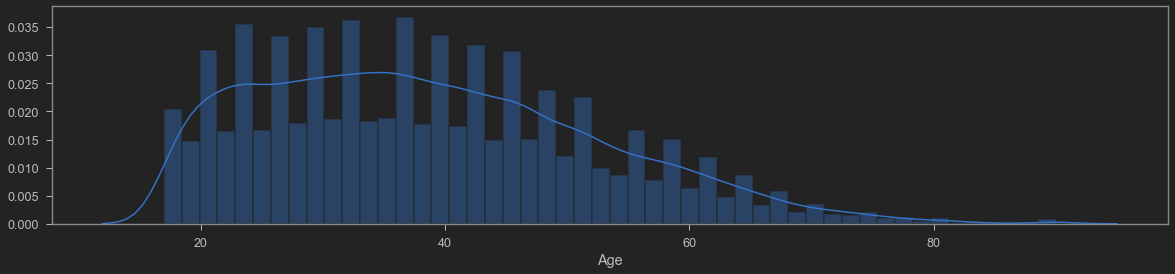

In [32]:
plt.figure(figsize=(20,4))
sns.distplot(df['Age'], hist_kws=dict(edgecolor="k", linewidth=2));

The dataset is dominated by young people between 20 and 40 years.

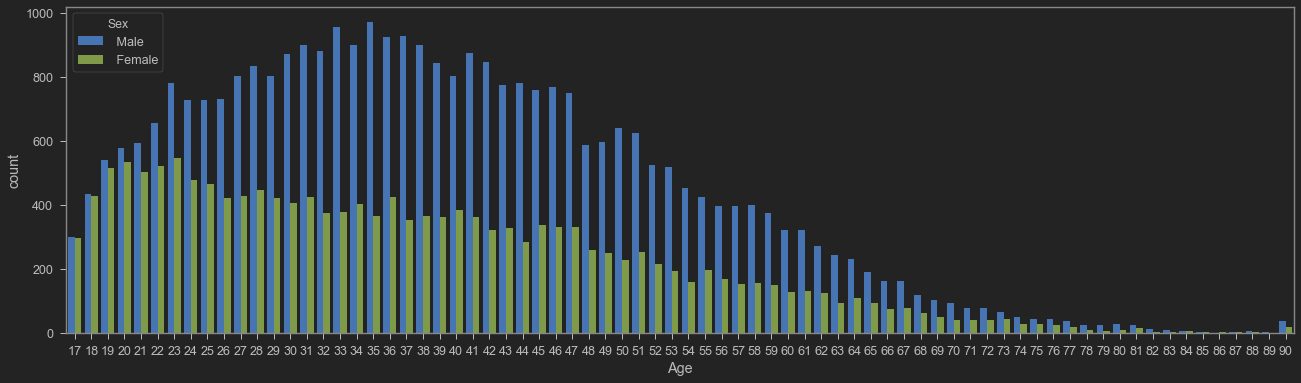

In [33]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Sex']);

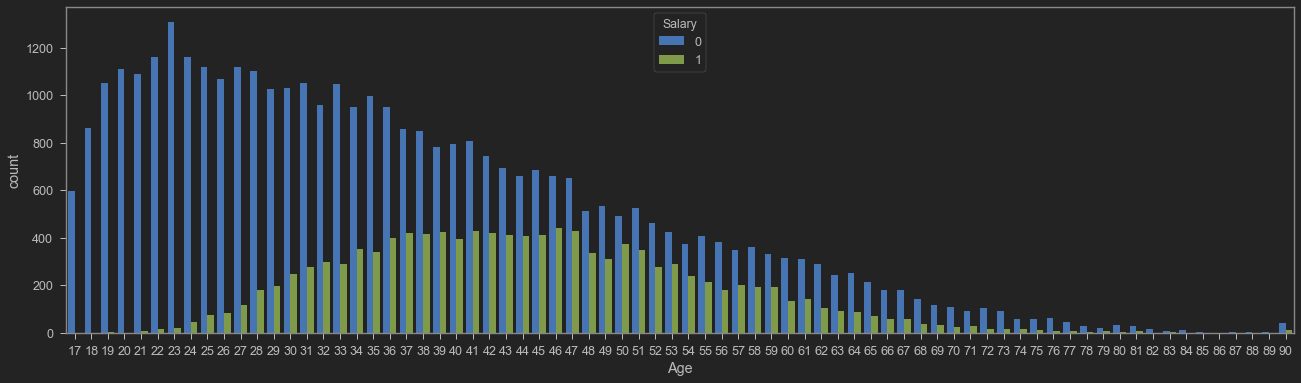

In [34]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Salary']);

The largest group of representants are people in their 30s:

In [35]:
df['Age'].mode()

0    36
dtype: int64

## FNLWGT
Final weight, which is the number of units in the target population that the responding unit represents.

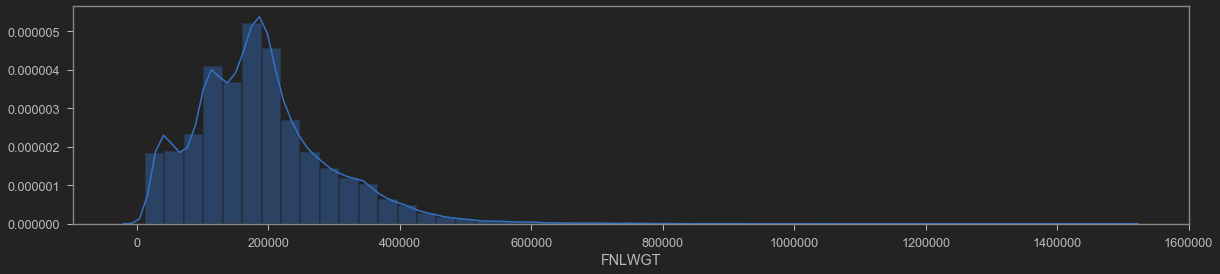

In [36]:
plt.figure(figsize=(20,4))
sns.distplot(df['FNLWGT'], hist_kws=dict(edgecolor="k", linewidth=2));

### Work class

In [37]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

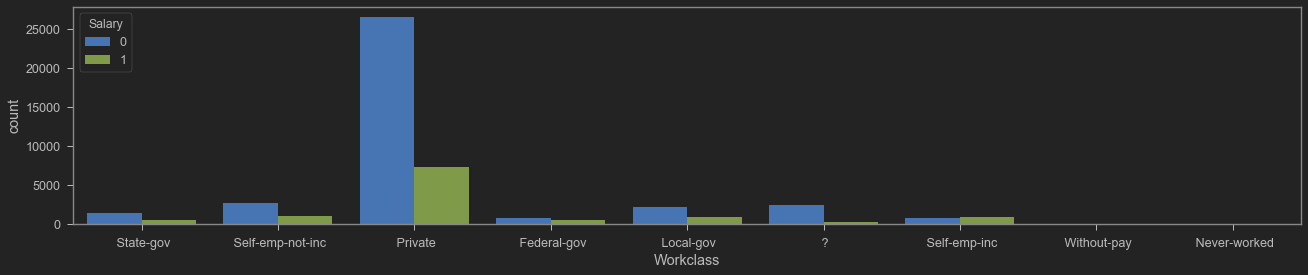

In [38]:
plt.figure(figsize=(22,4))
sns.countplot(df['Workclass'], hue=df['Salary']);

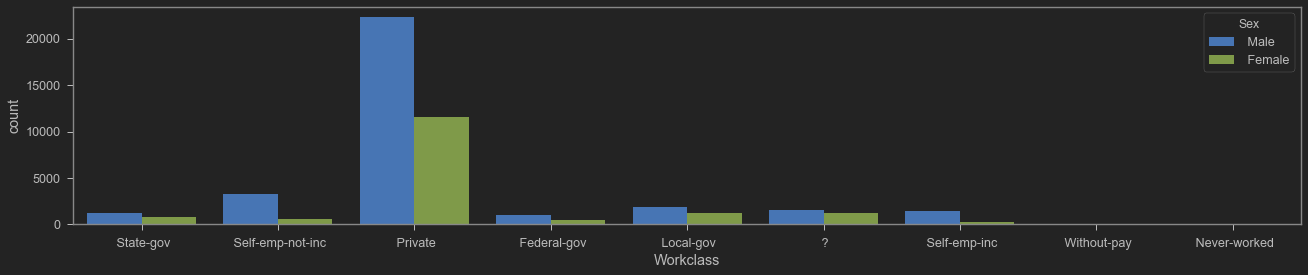

In [39]:
plt.figure(figsize=(22,4))
sns.countplot(df['Workclass'], hue=df['Sex']);

The dataset represent mostly men, employed in private companies.

### Education:

In [40]:
df['Education'].sort_values().unique()

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

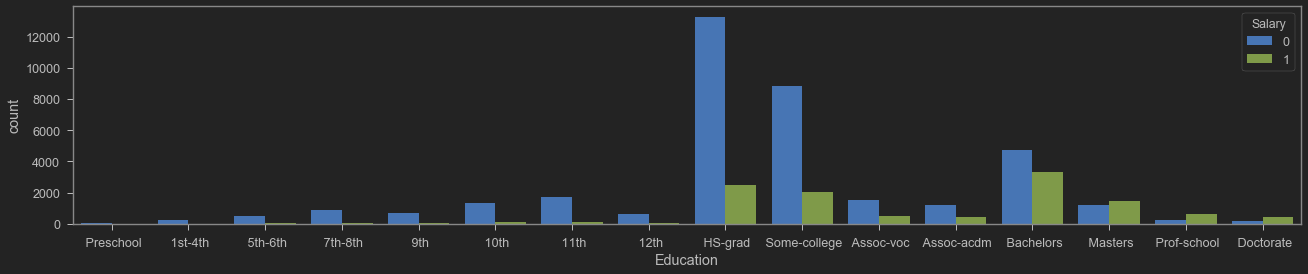

In [41]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education'],
              hue=df['Salary'],
              order=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', 
                     ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate']);

### Education number

In [42]:
df['Education-num'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

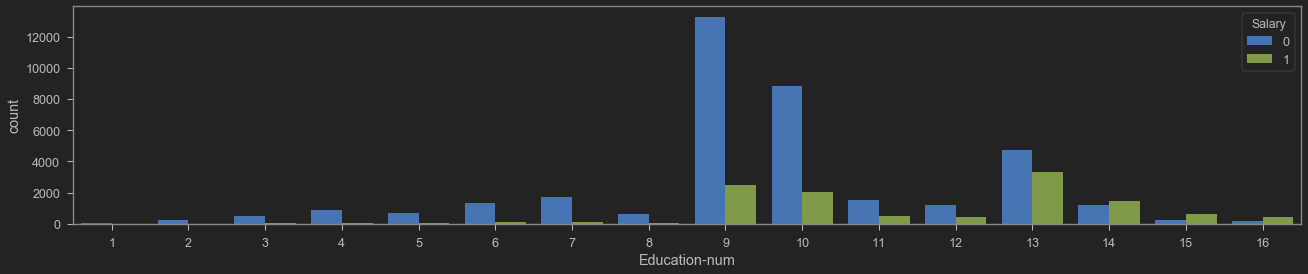

In [43]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education-num'], hue=df['Salary']);

Column 'Education-num' is completely redundant with 'Education' and can be removed:

In [44]:
df.drop('Education-num', axis=1, inplace=True)

### Marital status

In [45]:
df['Marital-status'].sort_values().unique()

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

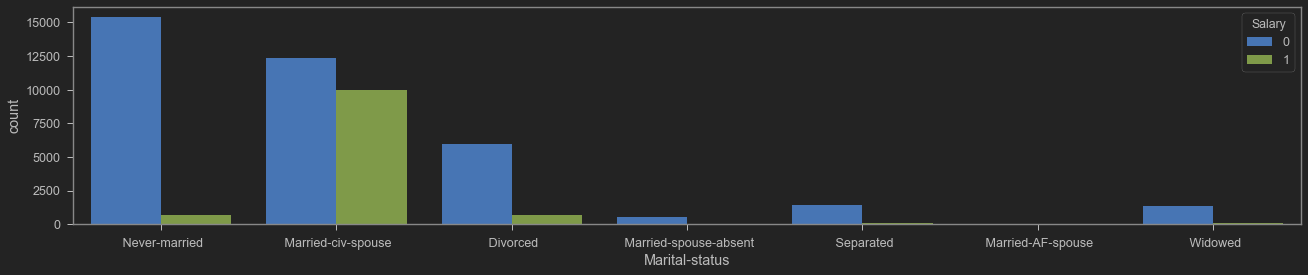

In [46]:
plt.figure(figsize=(22,4))
sns.countplot(df['Marital-status'], hue=df['Salary']);

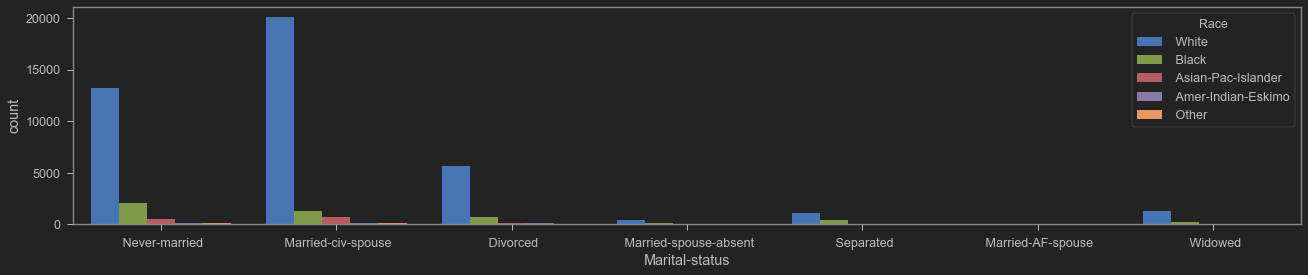

In [47]:
plt.figure(figsize=(22,4))
sns.countplot(df['Marital-status'], hue=df['Race']);

### Occupation:

In [48]:
df['Occupation'].sort_values().unique()

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

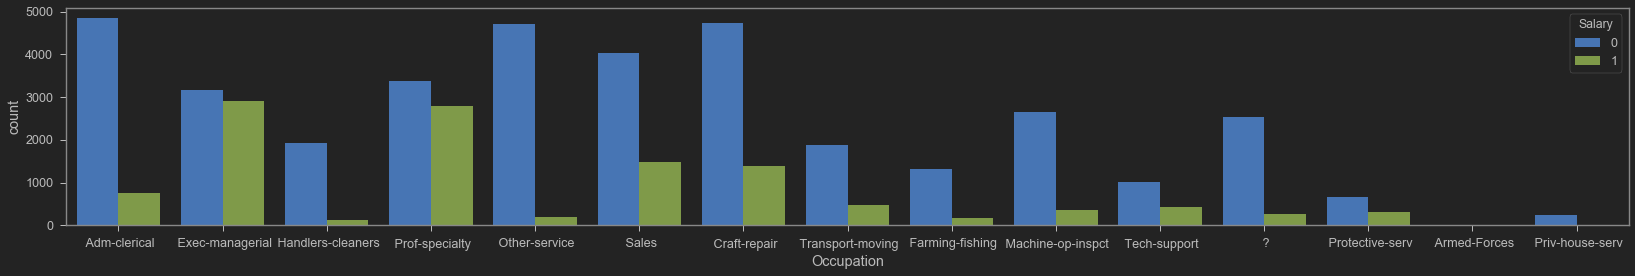

In [49]:
plt.figure(figsize=(28,4))
sns.countplot(df['Occupation'], hue=df['Salary']);

### Relationship

In [50]:
df['Relationship'].sort_values().unique()

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

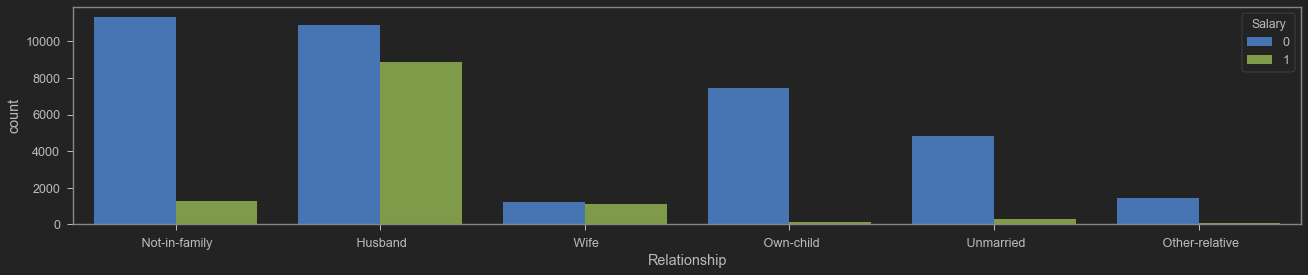

In [51]:
plt.figure(figsize=(22,4))
sns.countplot(df['Relationship'], hue=df['Salary']);

### Race:

In [52]:
df['Race'].sort_values().unique()

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

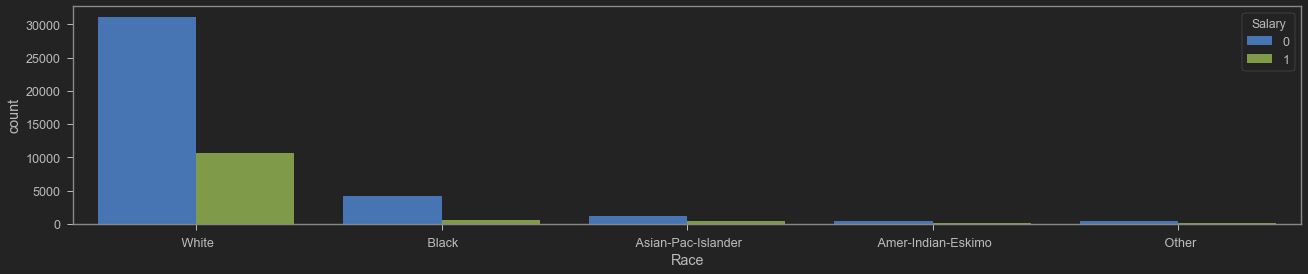

In [53]:
plt.figure(figsize=(22,4))
sns.countplot(df['Race'], hue=df['Salary']);

### Sex:

In [54]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

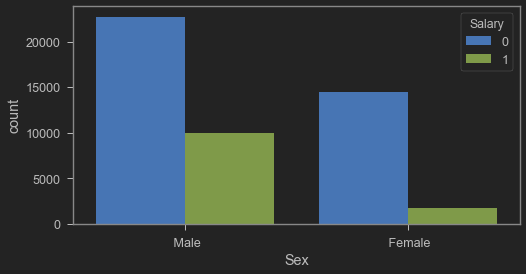

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(df['Sex'], hue=df['Salary']);

### Capital gain:

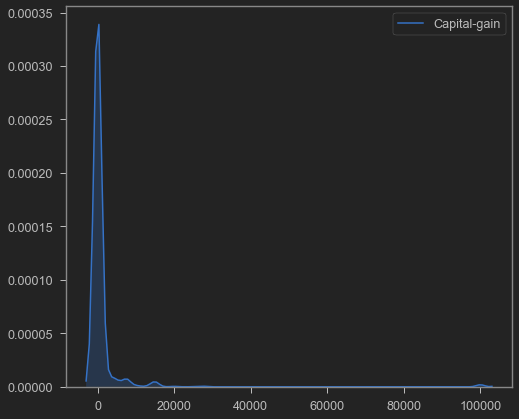

In [56]:
sns.kdeplot(df['Capital-gain'], bw=1000, shade=True);

In [57]:
df[df['Capital-gain'] == 99999].count()

Age               244
Workclass         244
FNLWGT            244
Education         244
Marital-status    244
Occupation        244
Relationship      244
Race              244
Sex               244
Capital-gain      244
Capital-loss      244
Week-Hours        244
Native-country    244
Salary            244
dtype: int64

Whereas 0s are possible, the 244 instances of 99999s look suspicious and are probably just a placeholder for missing values.

In [58]:
df[df['Capital-gain'] == 0]['Age'].count()/df['Age'].count()

0.9173866754023177

92% of the people had Capital-gain equal to 0.

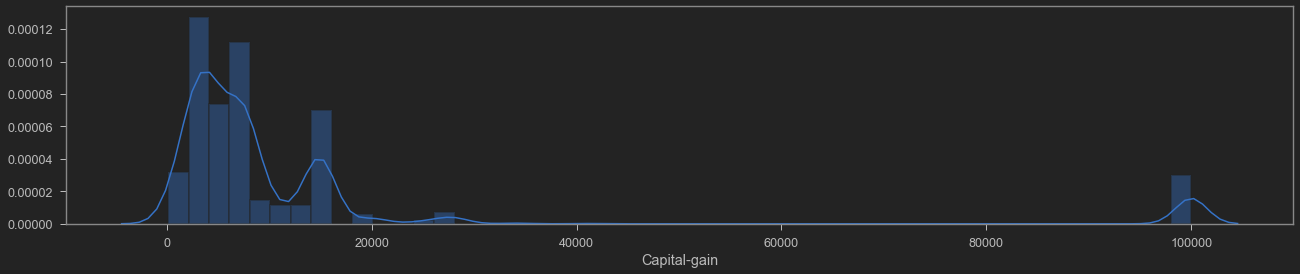

In [59]:
plt.figure(figsize=(22,4))
sns.distplot(df[df['Capital-gain'] > 0]['Capital-gain'], hist_kws=dict(edgecolor="k", linewidth=2));

Checking where are located the faulty 99999s. Let's remember I concatenated earlier the test set (rows ~32000-48000):

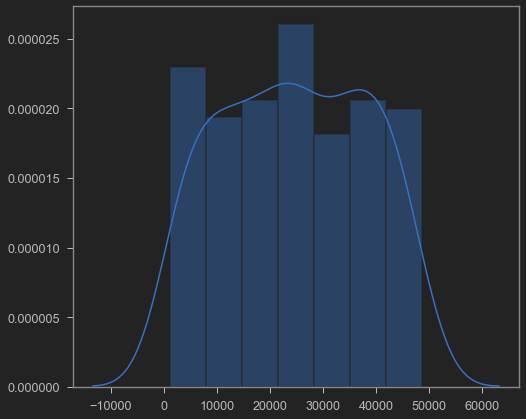

In [60]:
sns.distplot(df[df['Capital-gain'] == 99999].index, hist_kws=dict(edgecolor="k", linewidth=2));

#### Removing rows, where Capital-gain = 99999:

In [61]:
df.drop(df[df['Capital-gain'] == 99999].index, inplace=True)

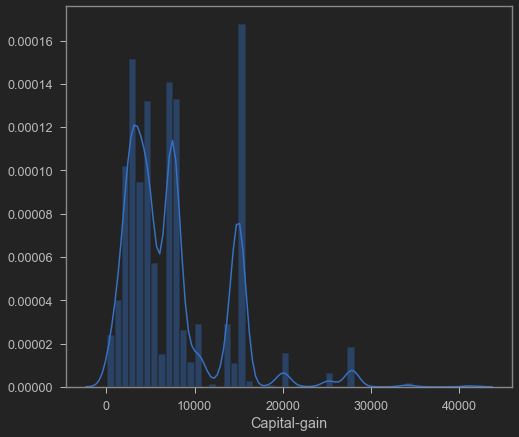

In [62]:
sns.distplot(df[df['Capital-gain'] > 0]['Capital-gain'], hist_kws=dict(edgecolor="k", linewidth=2));

### Capital loss:

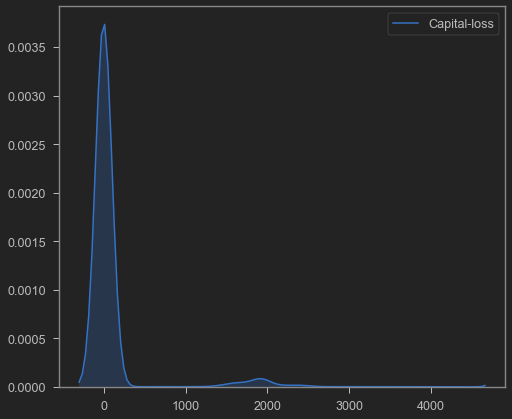

In [63]:
sns.kdeplot(df['Capital-loss'], bw=100, shade=True);

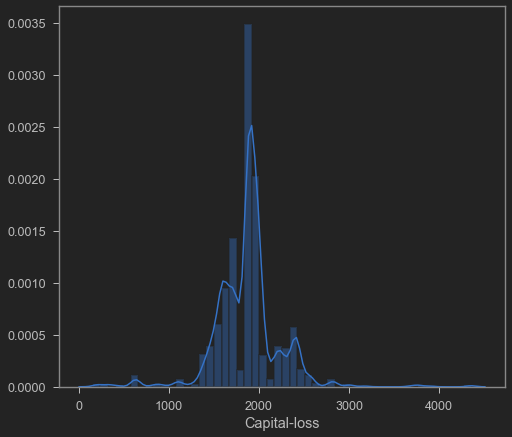

In [64]:
sns.distplot(df[df['Capital-loss'] > 0]['Capital-loss'], hist_kws=dict(edgecolor="k", linewidth=2));

### Work hours per week

In [65]:
df['Week-Hours'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99], dtype=int64)

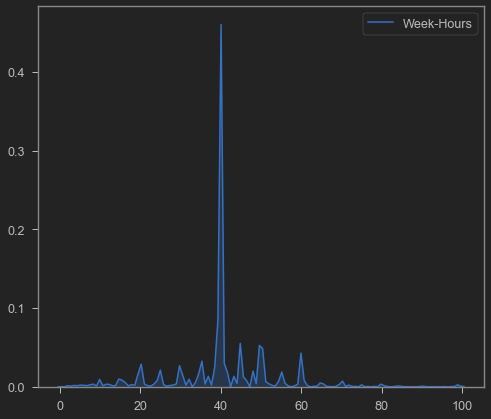

In [66]:
sns.kdeplot(df['Week-Hours'], shade=True);

It is very unlikely someone works (especially effectively) 99 hours per week but let's assume they are <u>not</u> missing values but rather outliers.

In [67]:
df[df['Week-Hours'] == 99]

,Age,Workclass,FNLWGT,Education,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,1
1887,55,Self-emp-not-inc,184425,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
3578,37,Self-emp-inc,382802,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
4086,50,?,174964,10th,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47050,31,?,170513,HS-grad,Divorced,?,Not-in-family,White,Female,0,0,99,United-States,0
47107,32,State-gov,246282,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,2961,0,99,?,0
47376,49,?,111282,7th-8th,Married-civ-spouse,?,Husband,White,Male,4386,0,99,United-States,1
47760,48,Private,250736,HS-grad,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,0


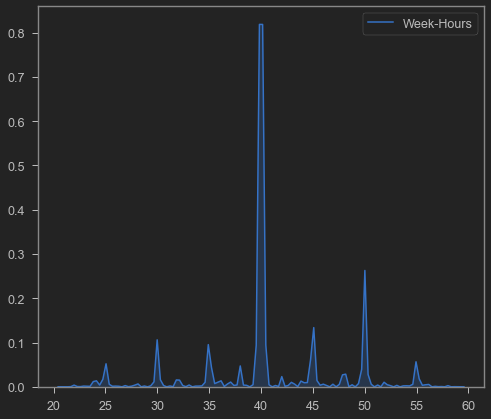

In [68]:
sns.kdeplot(df[(df['Week-Hours'] > 20) & (df['Week-Hours'] < 60)]['Week-Hours'], shade=True);

It looks like 50-hour wokring week is the second most common weekly worktime. 

### Native country:

In [69]:
df['Native-country'].sort_values().unique()

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

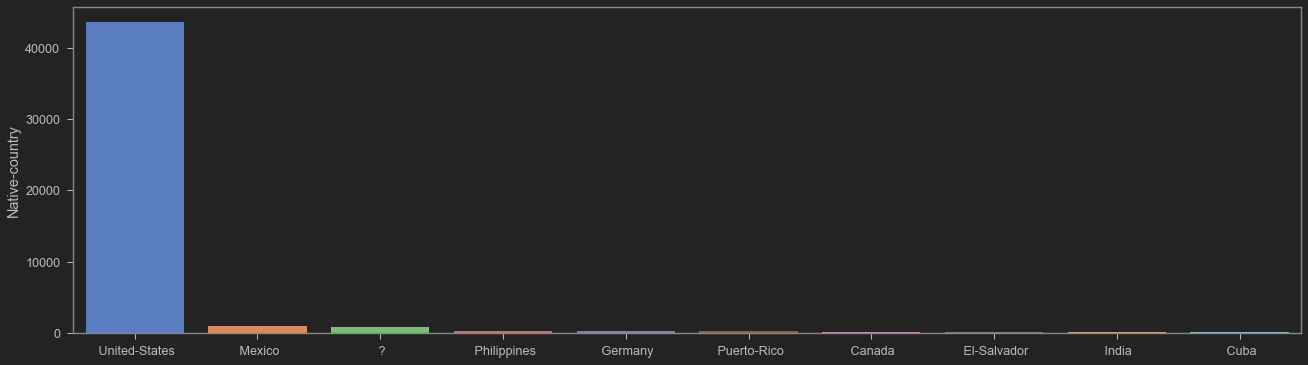

In [70]:
plt.figure(figsize=(22,6))
sns.barplot(x=df['Native-country'].value_counts().head(10).index, 
            y=df['Native-country'].value_counts().head(10),
            palette='muted');

The vast majority of respondents comes from USA. The count for other countries is the following:

In [71]:
df[df['Native-country'] != ' United-States']['Native-country'].value_counts().head(20)

 Mexico                949
 ?                     847
 Philippines           292
 Germany               206
 Puerto-Rico           184
 Canada                181
 El-Salvador           155
 India                 147
 Cuba                  138
 England               127
 China                 121
 South                 114
 Jamaica               106
 Italy                 105
 Dominican-Republic    102
 Japan                  91
 Guatemala              88
 Poland                 87
 Vietnam                86
 Columbia               85
Name: Native-country, dtype: int64

## Replace "?" with NaN

In [72]:
df = df.replace({' ?': np.nan})

In [73]:
df

,Age,Workclass,FNLWGT,Education,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


## Inspecting really missing values:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48598 non-null  int64 
 1   Workclass       45804 non-null  object
 2   FNLWGT          48598 non-null  int64 
 3   Education       48598 non-null  object
 4   Marital-status  48598 non-null  object
 5   Occupation      45794 non-null  object
 6   Relationship    48598 non-null  object
 7   Race            48598 non-null  object
 8   Sex             48598 non-null  object
 9   Capital-gain    48598 non-null  int64 
 10  Capital-loss    48598 non-null  int64 
 11  Week-Hours      48598 non-null  int64 
 12  Native-country  47751 non-null  object
 13  Salary          48598 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.6+ MB


In [75]:
df.isnull().sum()

Age                  0
Workclass         2794
FNLWGT               0
Education            0
Marital-status       0
Occupation        2804
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Week-Hours           0
Native-country     847
Salary               0
dtype: int64

### Rows with missing values:

In conclusion, there are missing values in the following columns: 'Workclass', 'Occupation', 'Native-country'. The rows are exactly:

In [76]:
df[df.isnull().any(axis=1)]

,Age,Workclass,FNLWGT,Education,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,180211,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,226956,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,293936,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
48800,73,NaN,144872,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,0
48812,81,NaN,26711,Assoc-voc,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,0
48826,50,Local-gov,139347,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,1


## Categorical Imputing using SimpleImputer
Using "most frequent" value method in this case: <br>
Note: SimpleImputer returns an array and we loose column types (to be adressed a few lines below):

In [77]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df_filled = imputer.fit_transform(df[["Workclass", "Occupation", "Native-country"]])

df[["Workclass", "Occupation", "Native-country"]] = df_filled
df

,Age,Workclass,FNLWGT,Education,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,HS-grad,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


Simple Imputer gives back a numpy array. Re-initializing a new dataframe results in loosing the dtypes of the initial columns:

In [78]:
df.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

In [79]:
df.dtypes

Age                int64
Workclass         object
FNLWGT             int64
Education         object
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Week-Hours         int64
Native-country    object
Salary             int64
dtype: object

## Data exploration:

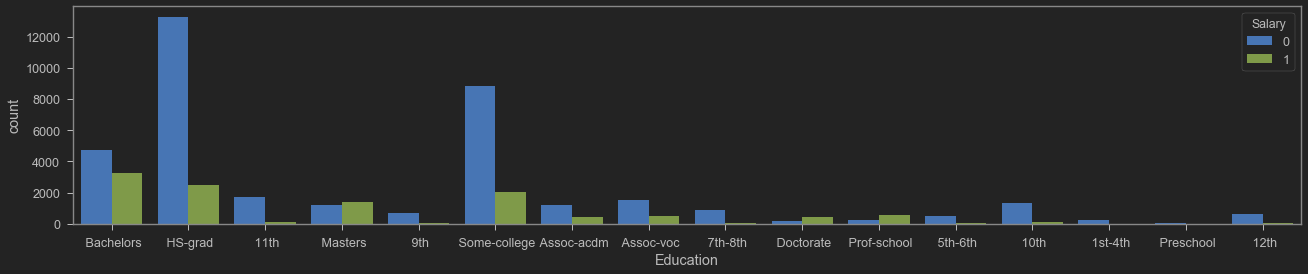

In [80]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education'],hue=df['Salary']);

### Chances of >50k Salary by education number:

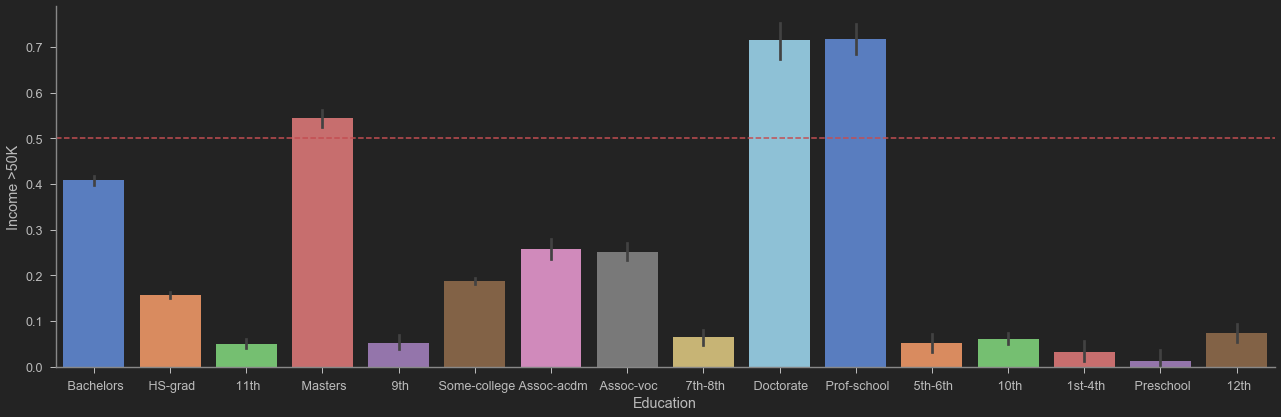

In [81]:
g = sns.catplot(x="Education", y="Salary", data=df,
                   kind="bar", 
                   height=6,
                   aspect=3,
                   palette = "muted");
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by work class:

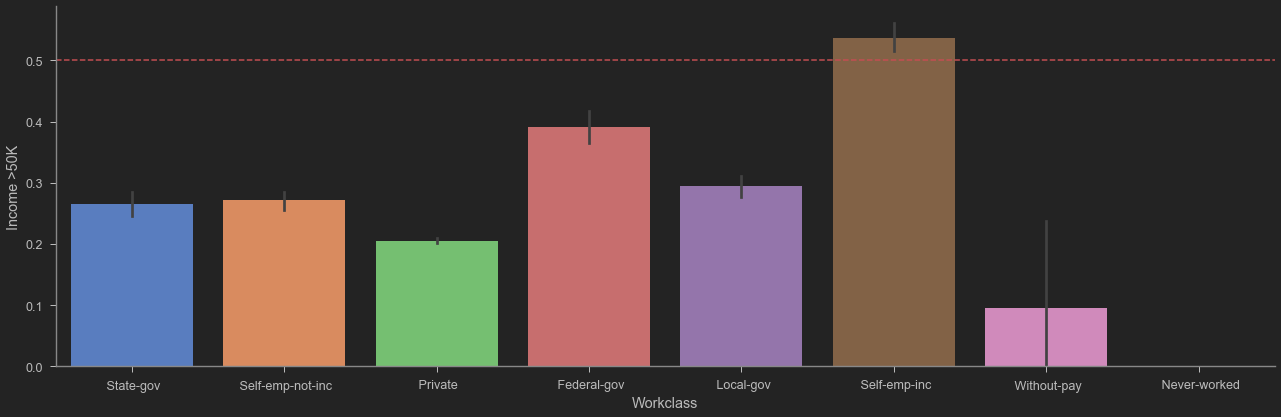

In [82]:
g = sns.catplot(x="Workclass", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Workclass and worktime:

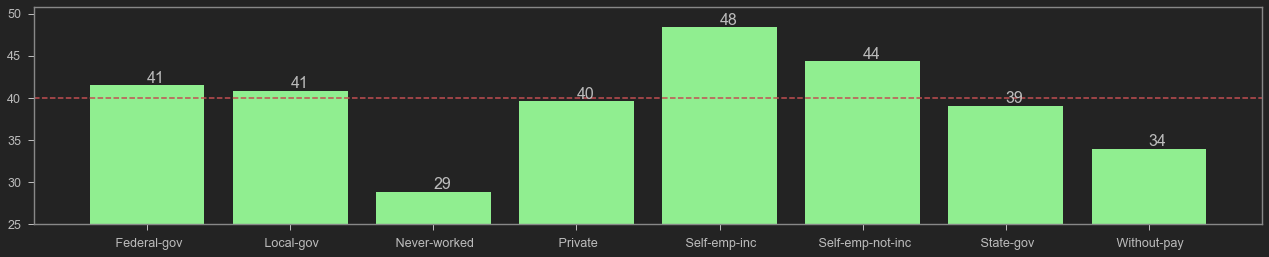

In [83]:
ind = df.groupby(by='Workclass')['Week-Hours'].mean().index
val = df.groupby(by='Workclass')['Week-Hours'].mean()

plt.figure(figsize=(22,4))
plt.bar(ind, val, color='lightgreen')

for index, value in enumerate(val):
    plt.text(index, value, str(round(value)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=40, color='r', linestyle='--')
plt.ylim(25);

In [84]:
ind

Index([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object', name='Workclass')

In [85]:
val

Workclass
 Federal-gov         41.489510
 Local-gov           40.837967
 Never-worked        28.900000
 Private             39.594165
 Self-emp-inc        48.362691
 Self-emp-not-inc    44.340921
 State-gov           39.058675
 Without-pay         33.952381
Name: Week-Hours, dtype: float64

### Chances of >50k Salary by occupation:

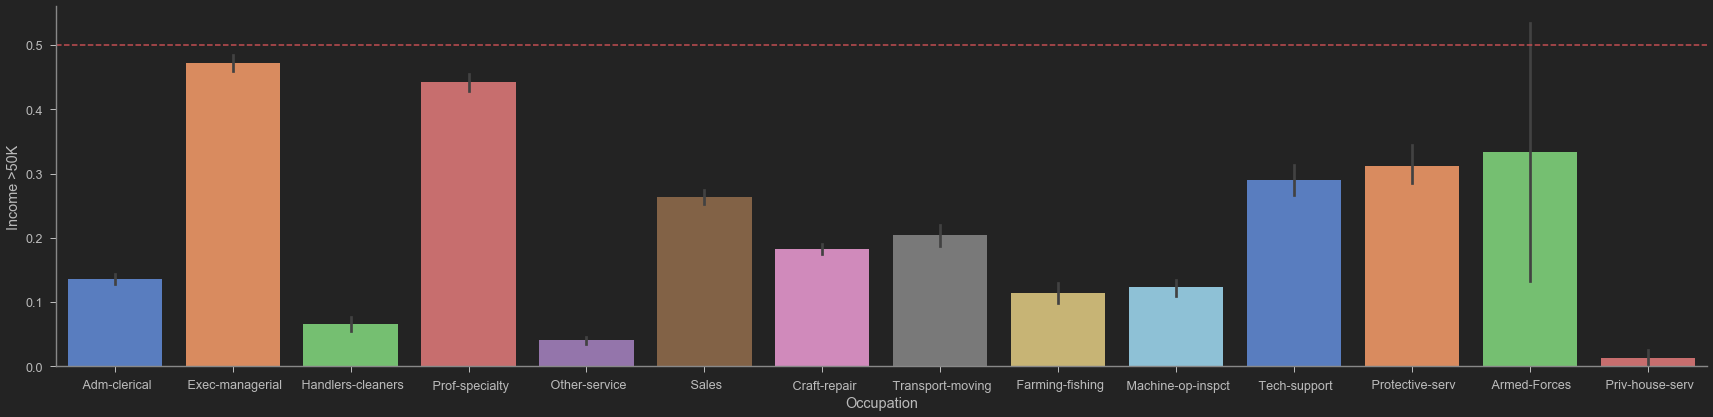

In [86]:
g = sns.catplot(x="Occupation", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=4, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by marital status:

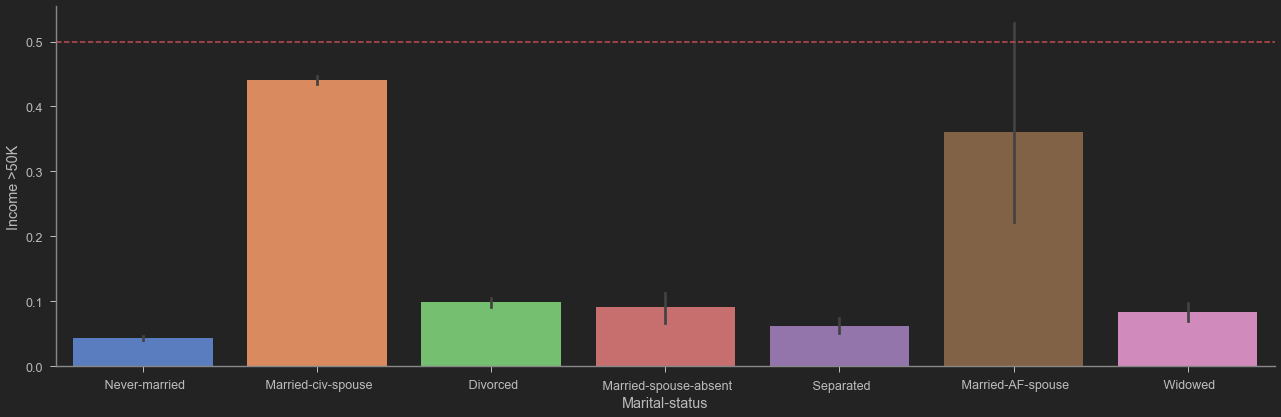

In [87]:
g = sns.catplot(x="Marital-status", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by age (career years between the age of 25 and 65):

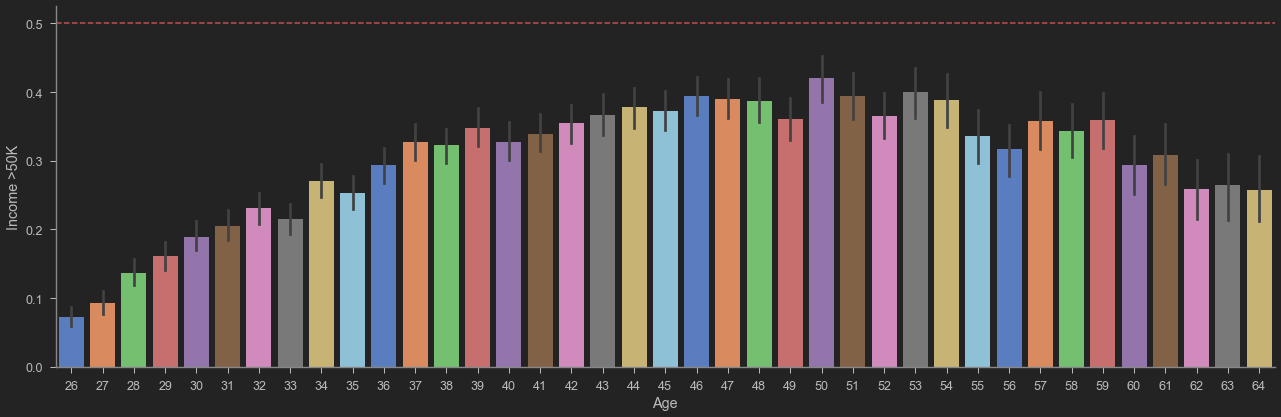

In [88]:
g = sns.catplot(x="Age", y="Salary", data=df[(df['Age']>25) & (df['Age']<65)],
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

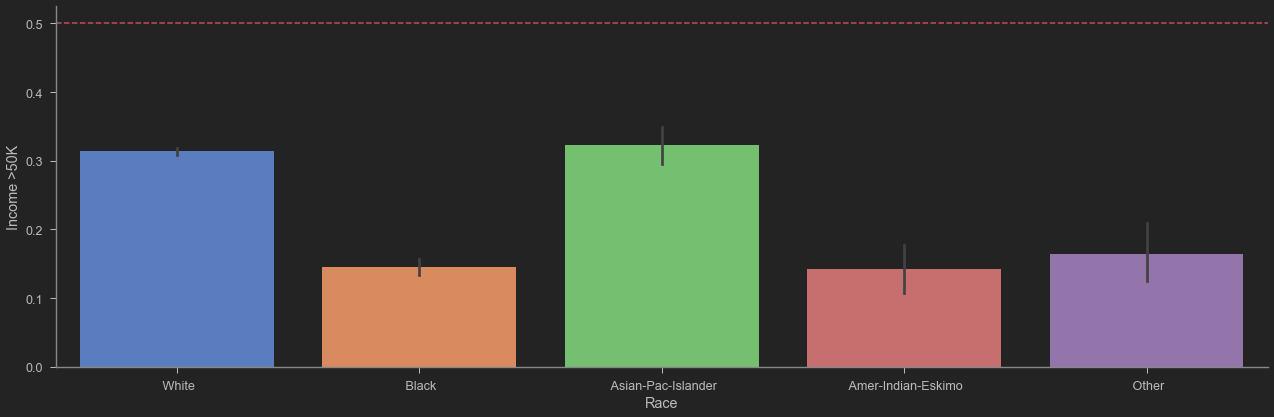

In [89]:
g = sns.catplot(x="Race", y="Salary", data=df[(df['Age']>25) & (df['Age']<65)],
                   kind="bar",
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

## DataFrame Backup:

In [90]:
df_backup = df.copy()

## Feature engineering - Workclass

In [91]:
d = {' Private': 'Private', 
     ' Local-gov': 'Employee', 
     ' Federal-gov': 'Employee',
     ' State-gov': 'Employee',
     ' Self-emp-not-inc': 'Private', 
     ' Self-emp-inc': 'Private', 
     ' Without-pay': 'Unemployed'}

df['Workclass'] = df['Workclass'].map(d)

## Feature engineering - Education

In [92]:
d = {' Preschool': 'Early',
     ' 1st-4th': 'Early',
     ' 5th-6th': 'Early',
     ' 7th-8th': 'Early',
     ' 9th': 'Early',
     ' 10th': 'Early',
     ' 11th': 'Early',
     ' 12th': 'Early',
     ' HS-grad': 'Highschool',
     ' Some-college': 'Highschool',
     ' Assoc-voc': 'University',
     ' Assoc-acdm': 'University',
     ' Bachelors': 'University',
     ' Masters': 'University',
     ' Prof-school': 'University',
     ' Doctorate':'University'}

df['Education'] = df['Education'].map(d)

## Feature engineering - Marital status

In [93]:
d = {' Never-married': 'Single', 
     ' Married-civ-spouse': 'Married', 
     ' Divorced': 'Single', 
     ' Widowed': 'Single',
     ' Married-spouse-absent': 'Married', 
     ' Separated': 'Single', 
     ' Married-AF-spouse': 'Married'}

df['Marital-status'] = df['Marital-status'].map(d)

## Race

In [94]:
def race(record):
    if record == ' White':
        return 'White'
    else:
        return 'Non-white'

df['Race'] = df['Race'].apply(race)

## Feature engineering - Relationship
After a couple of re-mapping attempts, this columns is very similar to 'Marital-status' so I decided to remove it:

In [95]:
df.drop('Relationship', axis=1, inplace=True)

## Feature engineering - Capital-gain
1 if Capital-gain was > 0 and 0 if someone did not have any gain.

In [96]:
df['Capital-gain'] = df['Capital-gain'].apply(lambda record: 'Yes' if record > 0 else 'No')

## Feature engineering - Capital-loss
1 if Capital-loss was > 0 and 0 if someone did not have any loss.

In [97]:
df['Capital-loss'] = df['Capital-loss'].apply(lambda record: 'Yes' if record > 0 else 'No')

## Week-Hours
Leaving only 3 categories: those who work less than 40, 40 and more than 40 hours per week.

In [98]:
def hours(record):
    if record < 40:
        return 'Less'
    elif record == 40:
        return 'Standard'
    else:
        return 'More'

df['Week-Hours'] = df['Week-Hours'].apply(hours)

## Native-country:
1 if United States, 0 for other nationalities

In [99]:
def country(record):
    if record  == ' United-States':
        return 'USA'
    else:
        return 'Other-country'

df['Native-country'] = df['Native-country'].apply(country)

## After feature engineering:

In [100]:
df.head()

,Age,Workclass,FNLWGT,Education,Marital-status,Occupation,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,Employee,77516,University,Single,Adm-clerical,White,Male,Yes,No,Standard,USA,0
1,50,Private,83311,University,Married,Exec-managerial,White,Male,No,No,Less,USA,0
2,38,Private,215646,Highschool,Single,Handlers-cleaners,White,Male,No,No,Standard,USA,0
3,53,Private,234721,Early,Married,Handlers-cleaners,Non-white,Male,No,No,Standard,USA,0
4,28,Private,338409,University,Married,Prof-specialty,Non-white,Female,No,No,Standard,Other-country,0


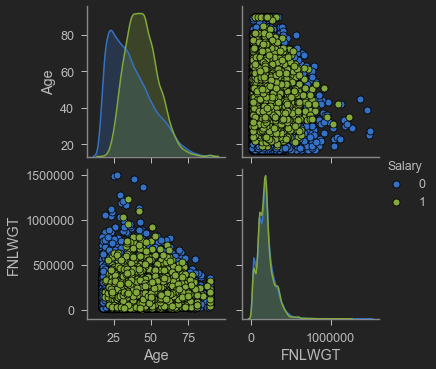

In [101]:
sns.pairplot(df, hue='Salary', plot_kws=dict(edgecolor="black"));

## Creating dummies for categorical variables:

In [102]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,FNLWGT,Salary,Workclass_Private,Workclass_Unemployed,Education_Highschool,Education_University,Marital-status_Single,Occupation_ Armed-Forces,Occupation_ Craft-repair,...,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_White,Sex_ Male,Capital-gain_Yes,Capital-loss_Yes,Week-Hours_More,Week-Hours_Standard,Native-country_USA
0,39,77516,0,0,0,0,1,1,0,0,...,0,0,0,1,1,1,0,0,1,1
1,50,83311,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,38,215646,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
3,53,234721,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,28,338409,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
48838,64,321403,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,1
48839,38,374983,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
48840,44,83891,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,1


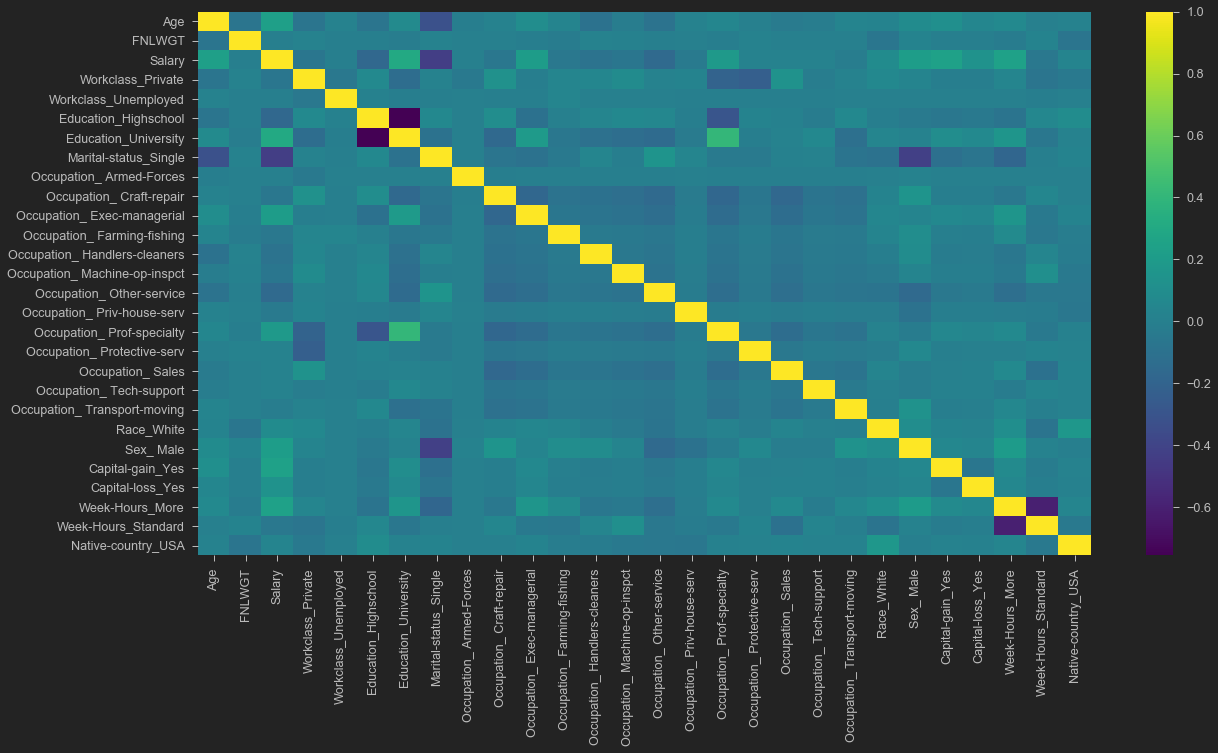

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='viridis')

Education_University is quite strong correlated with Occupation_Prof_Specialty - this makes sense. To be a specialist, often a higher level of education is needed.

## Train-Test set split

In [104]:
from sklearn.model_selection import train_test_split

y = df['Salary']
X = df.drop(['Salary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling the data
Not a must in logistic regression. Needed for KNN, SVM and Kernel-SVM because they are distance-based.

In [105]:
continuous_columns = ['Age', 'FNLWGT']

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train.loc[:, continuous_columns] = scaler.fit_transform(X_train.loc[:, continuous_columns])
X_test.loc[:, continuous_columns] = scaler.transform(X_test.loc[:, continuous_columns])

C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Choosing K for KNN Classifier:

In [107]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for k in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate [-]')

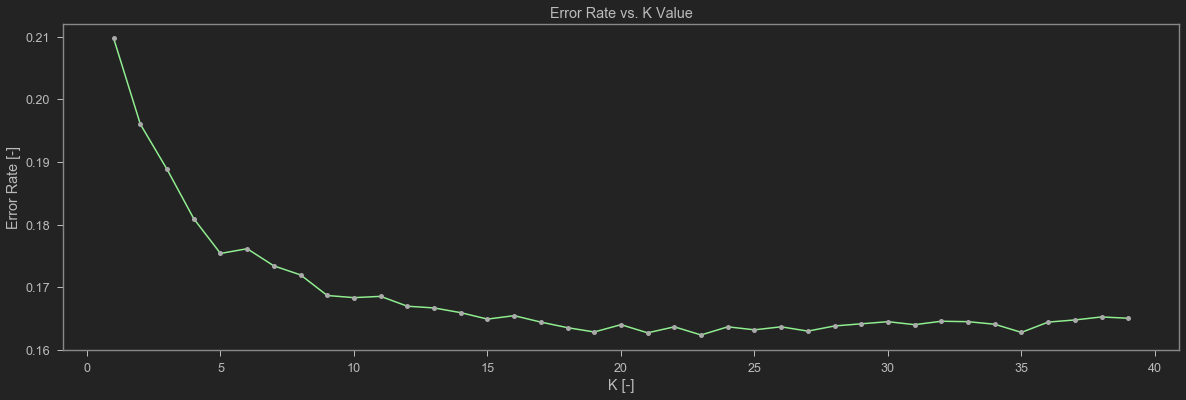

In [108]:
plt.figure(figsize=(20,6))

plt.plot(range(1,40),
         error_rate,color='lightgreen', marker='.', markerfacecolor='darkgrey', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K [-]')
plt.ylabel('Error Rate [-]')

## Model selection:

In [109]:
#Models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model evaluation:
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, f1_score

#Saving the models for later:
import pickle
import os.path

accuracies = []
f1_scores = []
    
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier(n_neighbors=15)),
          ('SVM', SVC(probability=True)),
          ('NB', GaussianNB()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=10)),
          ('XGB', XGBClassifier())]
    
for name, model in models:
    
    print(f'Current model: {model} \n')
    model.fit(X_train, y_train)
    
    #Cross validation:
    scoring_metrics = {'accuracy': make_scorer(accuracy_score), 
                       'f1_score': make_scorer(f1_score)}
    accuracy_results = model_selection.cross_validate(model, X_train, y_train, cv=10, scoring=scoring_metrics)
    
    #Retrieve the scores:
    model_accuracy = accuracy_results['test_accuracy']
    model_f1_score = accuracy_results['test_f1_score']
       
    #Append the lists:
    accuracies.append(model_accuracy)
    f1_scores.append(model_f1_score)
       
    #Save each model to disk: 
    current_directory = os.getcwd()
    #Create folder "Models":
    final_directory = os.path.join(current_directory, r'Models')
    if not os.path.exists(final_directory):
        os.makedirs(final_directory)
    
    #Use picke to save the model:    
    filename = final_directory+'\\'+name+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    #Use picke to save the accuracies:    
    filename = final_directory+'\\'+'Accuracies.sav'
    pickle.dump(accuracies, open(filename, 'wb'))
    
    #Use picke to save the F1-scores:    
    filename = final_directory+'\\'+'F1_scores.sav'
    pickle.dump(f1_scores, open(filename, 'wb'))

Current model: LogisticRegression(max_iter=1000) 

Current model: KNeighborsClassifier(n_neighbors=15) 

Current model: SVC(probability=True) 

Current model: GaussianNB() 

Current model: DecisionTreeClassifier() 

Current model: RandomForestClassifier(n_estimators=10) 

Current model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) 



## Load models from disk:

In [110]:
# model_loaded = pickle.load(open('.\\Models\\LR.sav', 'rb'))
# prediction_loaded = model_loaded.predict(X_test)

In [111]:
#accuracies = pickle.load(open('.\\Models\\Accuracies.sav', 'rb'))
#f1_scores = pickle.load(open('.\\Models\\F1_scores.sav', 'rb'))

#### Lists to numpy arrays:

In [112]:
accuracies = np.asarray(accuracies)
f1_scores = np.asarray(f1_scores)

#### DataFrame of F1 scores:

In [113]:
f1_df = pd.DataFrame(np.transpose(f1_scores), columns=['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'])
acc_df = pd.DataFrame(np.transpose(accuracies), columns=['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'])

### Cross-Validation F1-scores of each (k-th) fold per model:

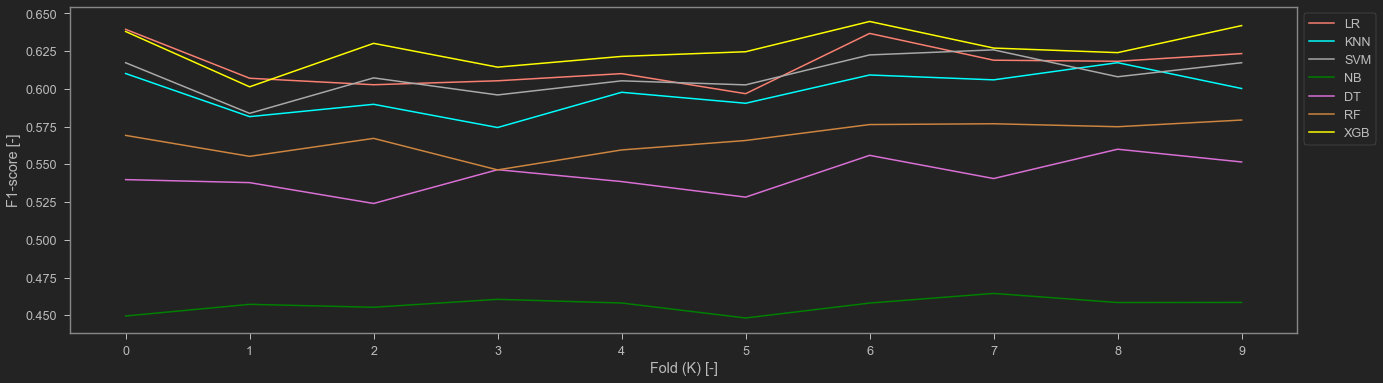

In [114]:
import cycler
plt.figure(figsize=(22,6))

for index, color in enumerate(['salmon','cyan', 'darkgrey', 'green', 'orchid', 'peru', 'yellow']):
    plt.plot(f1_df.iloc[:,index], color=color)

plt.xticks(np.arange(10))
plt.xlabel('Fold (K) [-]')
plt.ylabel('F1-score [-]')
plt.legend(f1_df.columns, bbox_to_anchor=(1.0, 1.0));

### Cross-Validation Accuracies of each (k-th) fold per model:

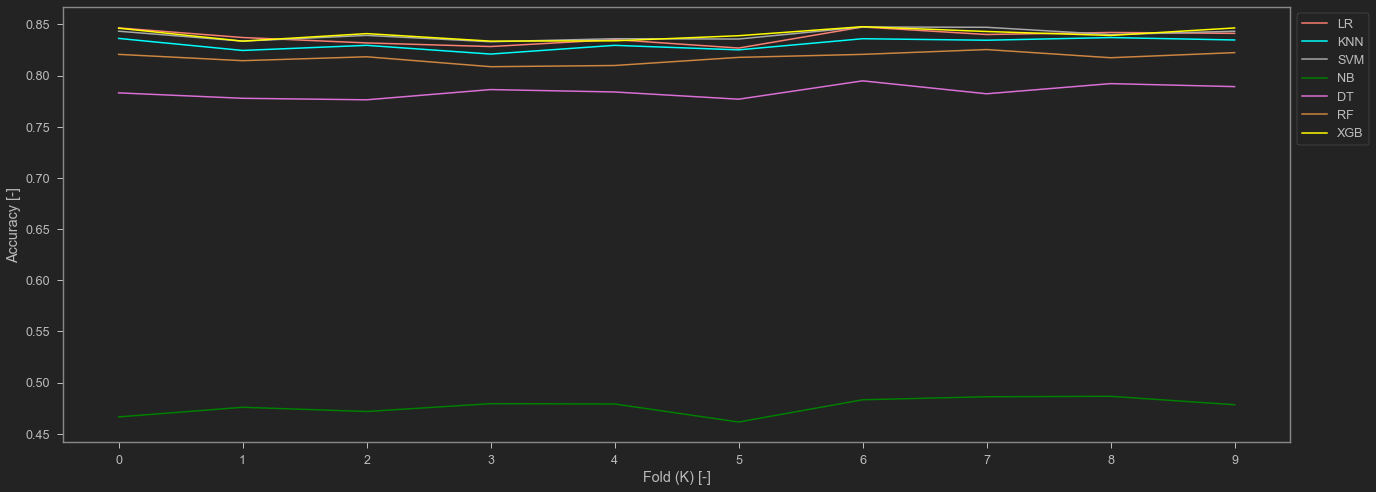

In [115]:
plt.figure(figsize=(22,8))

for index, color in enumerate(['salmon','cyan', 'darkgrey', 'green', 'orchid', 'peru', 'yellow']):
    plt.plot(acc_df.iloc[:,index], color=color)

plt.xticks(np.arange(10))
plt.xlabel('Fold (K) [-]')
plt.ylabel('Accuracy [-]')
plt.legend(f1_df.columns, bbox_to_anchor=(1.0, 1.0));

### Cross Validation Mean F1-scores:

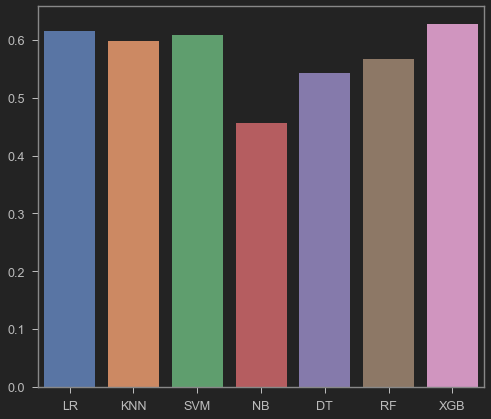

In [116]:
ax = sns.barplot(f1_df.columns, f1_df.mean(), palette='deep')
#ax.set(ylim=(0.0, 1))
ax.set_xticklabels(['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB']);

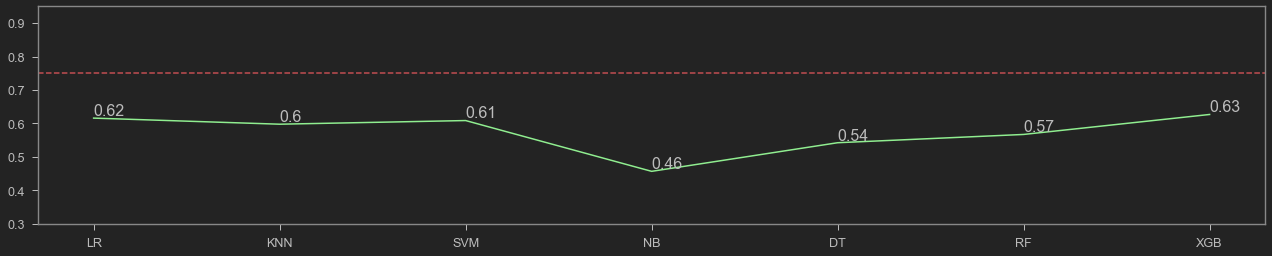

In [117]:
ind_f1 = f1_df.columns
val_f1 = f1_df.mean()

plt.figure(figsize=(22,4))
plt.plot(ind_f1, val_f1, color='lightgreen')

for index, value in enumerate(val_f1):
    plt.text(index, value, str(round(value, 2)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=0.75, color='r', linestyle='--')
plt.ylim(0.30,0.95);

### Cross Validation Mean Accuracy:

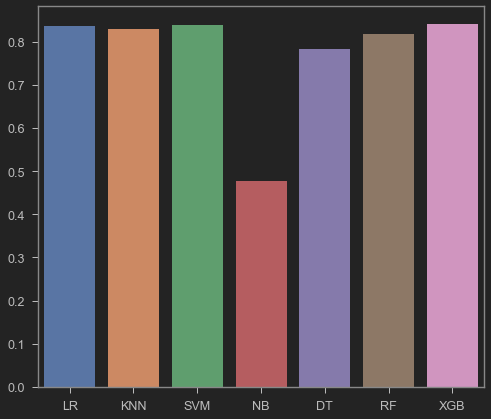

In [118]:
ax = sns.barplot(acc_df.columns, acc_df.mean(), palette='deep')
#ax.set(ylim=(0.0, 1))
ax.set_xticklabels(['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB']);

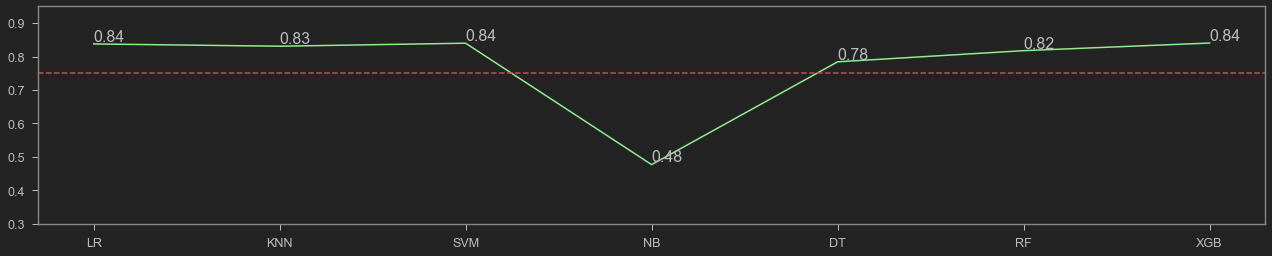

In [119]:
ind_acc = acc_df.columns
val_acc = acc_df.mean()

plt.figure(figsize=(22,4))
plt.plot(ind_acc, val_acc, color='lightgreen')

for index, value in enumerate(val_acc):
    plt.text(index, value, str(round(value, 2)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=0.75, color='r', linestyle='--')
plt.ylim(0.30,0.95);

# Some remarks:
<br>
It is important to note that these are the results of the models with <b>DEFAULT</b> parameters. <br><br>

For example: <br>
Logistic Regression could have specified e.g. C (inverse of regularization strength - smaller values specify stronger regularization), class weights, penalty norm (default='L2') or twhether to add/remove intercept term. <br>

KNN could have different number of neighbors (K). <br>

SVM could have different threshhold (Epsilon). <br>

Naive Bayes could have specified e.g. 'prior probabilities of the classes'. <br>

Decision Tree could have specified e.g. max depth or criterion to measure the quality of a split (default='gini'). <br>

Decision Tree could have specified e.g. the number of trees in the forest (important parmeter). <br>

XGB is tricky to tune but it could have specified e.g. n_estimators, learning_rate, max_depth or gamma (minimum loss reduction required to make a further partition on a leaf node of the tree.) 

## Boxplot - Accuracy

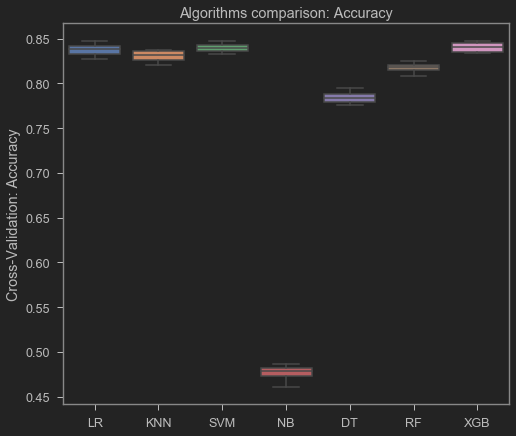

In [120]:
ax = sns.boxplot(data=acc_df, palette='deep')
ax.set_title('Algorithms comparison: Accuracy')
ax.set_ylabel('Cross-Validation: Accuracy');

## Boxplot - F1-score

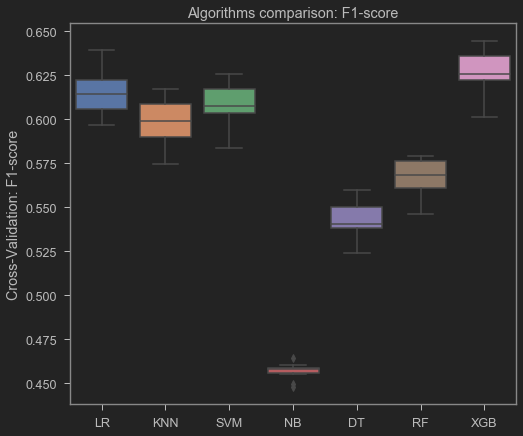

In [121]:
ax = sns.boxplot(data=f1_df, palette='deep')
ax.set_title('Algorithms comparison: F1-score')
ax.set_ylabel('Cross-Validation: F1-score');

In [122]:
acc_df.mean().sort_values(ascending=False).round(4)

XGB    0.8404
SVM    0.8399
LR     0.8377
KNN    0.8308
RF     0.8176
DT     0.7843
NB     0.4769
dtype: float64

In [123]:
f1_df.mean().sort_values(ascending=False).round(4)

XGB    0.6268
LR     0.6159
SVM    0.6086
KNN    0.5977
RF     0.5671
DT     0.5423
NB     0.4568
dtype: float64

## Automaticly selecting the best model:
Choice based on F1-score (here: XGB):

In [124]:
best_model = f1_df.mean().idxmax(axis=1) #returns string of the model abbreviation, e.g. 'XGB'

best_model_loaded = pickle.load(open('.\\Models\\'+best_model+'.sav', 'rb'))
best_predictions = best_model_loaded.predict(X_test)

print(f'The best model was: {best_model}')

The best model was: XGB


In [125]:
#Using last model in memory (XGB):
#prediction_model = model.predict(X_test)

## Confusion matrix

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, best_predictions)

array([[10293,   801],
       [ 1468,  2018]], dtype=int64)

Text(43.0, 0.5, 'Actual')

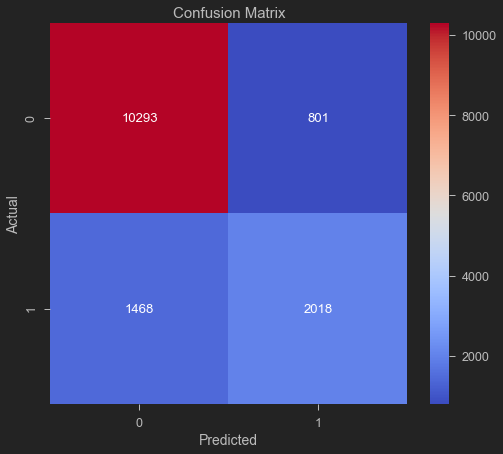

In [127]:
confusion_matrix_test = confusion_matrix(y_test, best_predictions)

sns.heatmap(confusion_matrix_test, 
            annot=True, 
            fmt="d", 
            cmap="coolwarm")

plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("Actual",fontsize=14)

In [128]:
print(classification_report(y_test, best_predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11094
           1       0.72      0.58      0.64      3486

    accuracy                           0.84     14580
   macro avg       0.80      0.75      0.77     14580
weighted avg       0.84      0.84      0.84     14580



## AUC - Area Under (ROC) Curve:
ROC - Receiver Operating Characteristic. <br>
Indicates how well the probabilities from the positive class are separated from the negative class.

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score

### Load models saved during model selection from disk:

In [130]:
#All models: 'LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'

model_predict_proba = dict()

#Without NB and DT as their curves were bad:
for saved_model in ['LR','KNN', 'SVM','RF', 'XGB']:

    model_loaded = pickle.load(open('.\\Models\\'+saved_model+'.sav', 'rb'))
    model_predict_proba[saved_model] = model_loaded.predict_proba(X_test)[:,1]

### ROC curve method 
Receiver Operating Characteristic (ROC) is used for illustrating the performance of a binary (two class) classifier.

fpr - Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i]. <br>

tpr - Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i]. <br>

threshold - Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

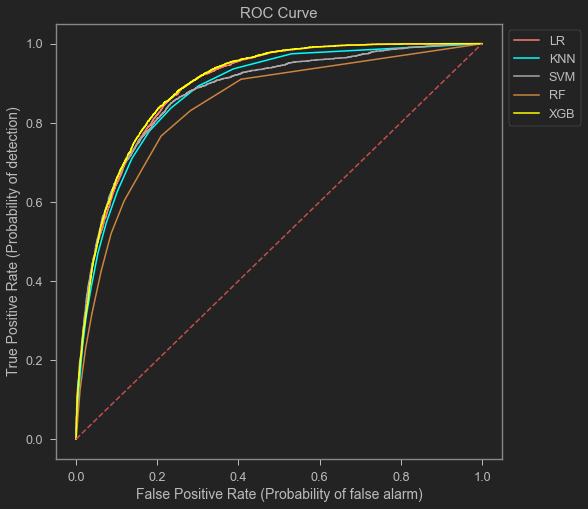

In [131]:
plt.figure(figsize=(8,8))
colors = iter(['salmon','cyan', 'darkgrey', 'peru', 'yellow'])

for key, value in model_predict_proba.items():
    
    fpr, tpr, thresholds  = roc_curve(y_test, model_predict_proba[key])
    plt.plot(fpr, tpr, color=next(colors))
        
    plt.xlabel('False Positive Rate (Probability of false alarm)',fontsize=14)
    plt.ylabel('True Positive Rate (Probability of detection)',fontsize=14)
    plt.title('ROC Curve',fontsize=15)

plt.legend(model_predict_proba.keys(), bbox_to_anchor=(1.0, 1.0));
plt.plot([0, 1], [0, 1], 'r--') #auxiliary dashed red line
plt.show()

In [132]:
#Different colors:
#plt.set_prop_cycle(plt.cycler(color = ['salmon','cyan', 'darkgrey', 'peru', 'yellow']))
#plt.rcParams["axes.prop_cycle"] = plt.cycler(color = ['salmon','cyan', 'darkgrey', 'peru', 'yellow'])

## Under-sampling the imbalanced dataset

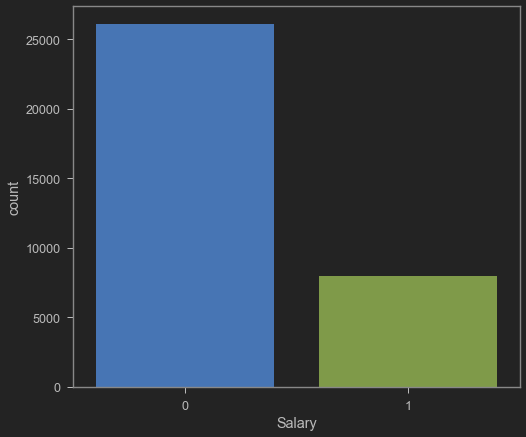

In [133]:
sns.countplot(y_train)

In [134]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)

X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = cc.fit_resample(X_test, y_test)

print(sorted(Counter(y_train_resampled).items()))

[(0, 7957), (1, 7957)]


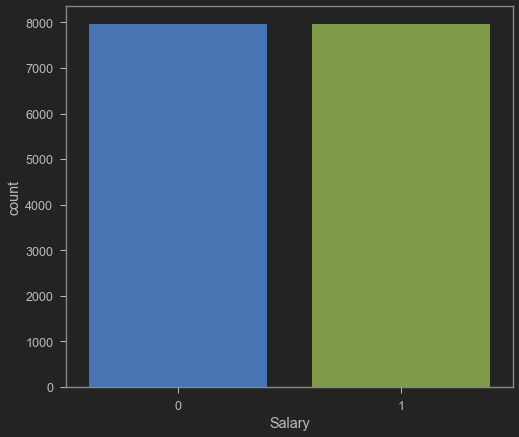

In [135]:
sns.countplot(y_train_resampled)

## Re-evaluation on the best model:

In [136]:
best_model_loaded.fit(X_train_resampled, y_train_resampled)
best_predictions_resampled = best_model_loaded.predict(X_test_resampled)

In [137]:
print(classification_report(y_test_resampled, best_predictions_resampled))

              precision    recall  f1-score   support

           0       0.88      0.84      0.85      3486
           1       0.84      0.88      0.86      3486

    accuracy                           0.86      6972
   macro avg       0.86      0.86      0.86      6972
weighted avg       0.86      0.86      0.86      6972



## Applying PCA - dimensionality reduction

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train_resampled_pca = pca.fit_transform(X_train_resampled)
X_test_resampled_pca = pca.transform(X_test_resampled)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26552911, 0.18198399])

## Re-evaluation on Logistic Regression model (LR):

In [139]:
lr_model_loaded = pickle.load(open('.\\Models\\'+'LR'+'.sav', 'rb'))
lr_predictions = lr_model_loaded.predict(X_test)

lr_model_loaded.fit(X_train_resampled_pca, y_train_resampled)

LogisticRegression(max_iter=1000)

In [140]:
lr_predictions_resampled_pca = lr_model_loaded.predict(X_test_resampled_pca)

In [141]:
print(classification_report(y_test_resampled, lr_predictions_resampled_pca))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3486
           1       0.62      0.62      0.62      3486

    accuracy                           0.62      6972
   macro avg       0.62      0.62      0.62      6972
weighted avg       0.62      0.62      0.62      6972



## Visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


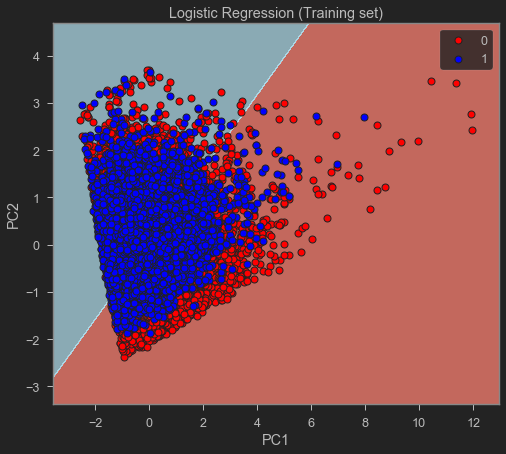

In [142]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_resampled_pca, y_train_resampled

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lr_model_loaded.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), 
                label = j, 
                edgecolors  = 'k',
                linewidths = 1)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


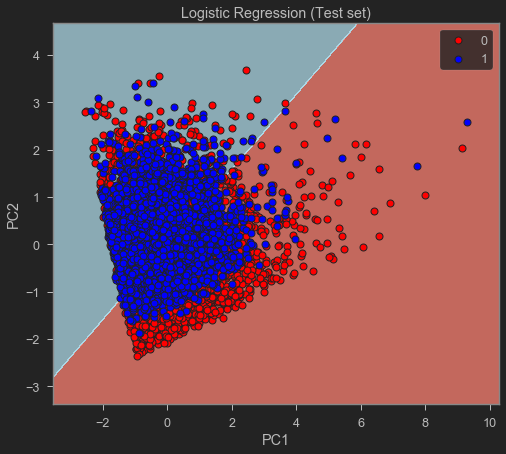

In [143]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test_resampled_pca, y_test_resampled

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lr_model_loaded.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), 
                label = j, 
                edgecolors  = 'k',
                linewidths = 1)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Applying Kernel PCA - dimensionality reduction

In [144]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf')

X_train_resampled_kpca = kpca.fit_transform(X_train_resampled)
X_test_resampled_kpca = kpca.transform(X_test_resampled)

In [145]:
lr_model_loaded.fit(X_train_resampled_kpca, y_train_resampled)

LogisticRegression(max_iter=1000)

In [146]:
lr_predictions_resampled_kpca = lr_model_loaded.predict(X_test_resampled_kpca)

In [147]:
print(classification_report(y_test_resampled, lr_predictions_resampled_kpca))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3486
           1       0.62      0.61      0.62      3486

    accuracy                           0.62      6972
   macro avg       0.62      0.62      0.62      6972
weighted avg       0.62      0.62      0.62      6972



## Visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


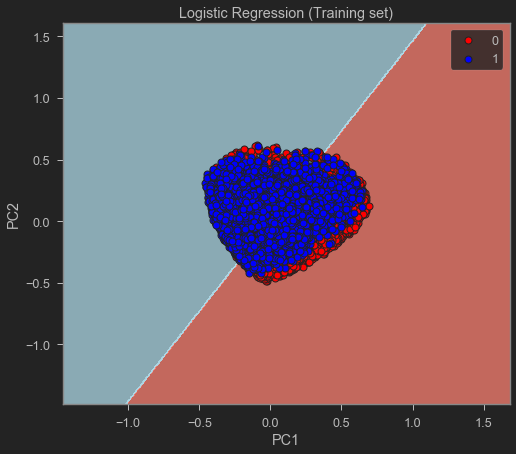

In [148]:
X_set, y_set = X_train_resampled_kpca, y_train_resampled

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lr_model_loaded.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), 
                label = j, 
                edgecolors  = 'k',
                linewidths = 1)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


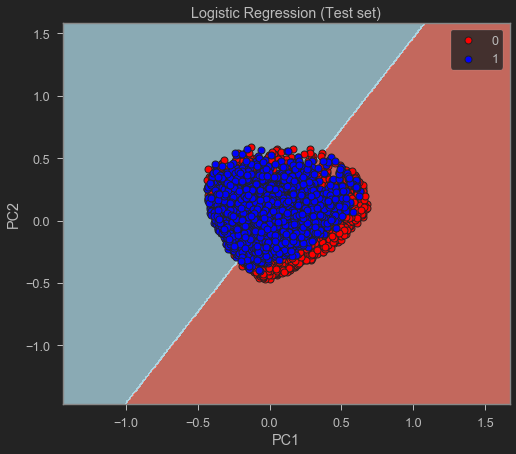

In [149]:
X_set, y_set = X_test_resampled_kpca, y_test_resampled

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lr_model_loaded.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), 
                label = j, 
                edgecolors  = 'k',
                linewidths = 1)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Total Execution time:

In [150]:
print(datetime.now() - startTime)

1:09:40.358031
